Rough Descsion Tree 

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score


from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_confusion_matrix, precision_score, recall_score 
from sklearn.model_selection import GridSearchCV


In [158]:
edited_df = pd.read_csv('C:/Users/tonym/Documents/Flatiron/phase_3/BankMarketingProject/data/eddited_bank.csv', sep = ';')

In [159]:
edited_df.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
poutcome      object
y             object
dtype: object

In [35]:
# convert target to integers 
# bank['y'] = bank['y'].replace(to_replace=['no', 'yes'], value=[0, 1])

In [66]:
edited_df.head()

,Unnamed: 0,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,unknown,no
1,1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,unknown,no
2,2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,unknown,no
3,3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,unknown,no
4,4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,unknown,no


Categorical columns
- job 
- contact
- marital
- education 
- month 
- poutcome 

In [93]:
edited_df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [72]:
print(edited_df['contact'].unique())

['unknown' 'cellular' 'telephone']


In [73]:
print(edited_df['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


In [67]:
print("Raw Counts")
print(edited_df["y"].value_counts())
print()
print("percentages")
print(edited_df["y"].value_counts(normalize=True))

Raw Counts
no     39922
yes     5289
Name: y, dtype: int64

percentages
no     0.883015
yes    0.116985
Name: y, dtype: float64


 a baseline model that always chose the majority class would have an accuracy of over 88%.

In [71]:
edited_df.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
poutcome      object
y             object
dtype: object

In [81]:
X = edited_df.drop('y', axis = 1)
y = edited_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### One hot encoder 

In [131]:
num_cols = []
ohe_cols = []


for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() <= 12:
        ohe_cols.append(c)
   

In [132]:
print(num_cols)


['Unnamed: 0', 'age', 'balance', 'day', 'duration', 'campaign']


In [133]:
print(ohe_cols)

['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [134]:
ohe_transformer = Pipeline(steps=[ 
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
])
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))
    ])

In [135]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols)        
    ])

In [136]:
# preprocessor.fit(X_train, y_train)

#### Run a model 

In [161]:
dt_base = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state = 42))
])

In [162]:
 dt_base.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Unnamed: 0', 'age',
                                                   'balance', 'day', 'duration',
                                                   'campaign']),
                                                 ('ohe',
                                                  Pipeline(steps=[('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                   

#### running a cross validation 

In [163]:
cross_validate(dt_base, X_train, y_train, return_train_score=True)

{'fit_time': array([0.70992112, 0.6742003 , 0.66572809, 0.66422439, 0.65250206]),
 'score_time': array([0.02193713, 0.02093244, 0.02294111, 0.02293658, 0.02290869]),
 'test_score': array([0.88838101, 0.88381009, 0.88543203, 0.88231824, 0.8855626 ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [164]:
cross_val_score(dt_base, X_train, y_train)

array([0.88838101, 0.88381009, 0.88543203, 0.88231824, 0.8855626 ])

#### checking some metrics 

In [213]:
y_pred = dt_base.predict(X_test)

### Some evaluation

In [214]:
acc_base = accuracy_score(y_test, y_pred)
acc

0.8882597540475979

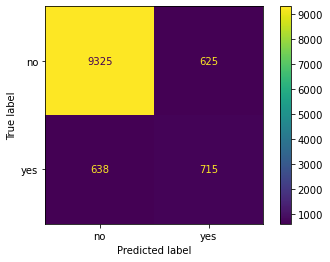

In [215]:
plot_confusion_matrix(dt_base, X_test, y_test)

In [169]:
dt_base.score(X_test, y_test)

0.8882597540475979

## Model 2 


#### Grid Search tests 

In [191]:
dt2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state = 42))
])

In [192]:
dt2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Unnamed: 0', 'age',
                                                   'balance', 'day', 'duration',
                                                   'campaign']),
                                                 ('ohe',
                                                  Pipeline(steps=[('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                   

In [197]:
grid = {
    "classifier__max_depth": [1, 5, 10],
    "classifier__min_samples_split": [2, 10, 100]
}

In [198]:
grid = GridSearchCV(estimator = dt2, param_grid = grid , scoring='accuracy')

In [199]:
output = grid.fit(X_train, y_train)

In [196]:
output.best_params_

{'classifier__max_depth': 5, 'classifier__min_samples_split': 100}

In [204]:
output.best_estimator_.fit(X_train, y_train)

test_preds = output.best_estimator_.predict(X_test)

In [205]:
test_preds

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

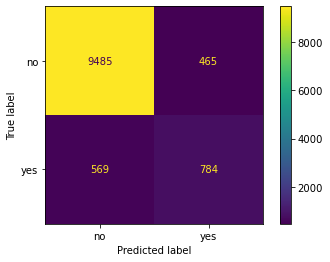

In [208]:
plot_confusion_matrix(output.best_estimator_, X_test, y_test)